# Libraries

In [1]:
import pandas as pd
import numpy as np

# Reading and adding label


In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["Label"] = 1
true["Label"] = 0

# Combining 

In [3]:
frames = [fake, true]
news_dataset= pd.concat(frames)


# Shuffling data

In [4]:
news_dataset = news_dataset .sample(frac = 1)
news_dataset.head()

,title,text,subject,date,Label
7853,Obama tells students at town hall about how fa...,"GREENSBORO, N.C. (Reuters) - President Barack ...",politicsNews,"October 12, 2016",0
8649,Sanders says would prefer Elizabeth Warren ove...,WASHINGTON (Reuters) - Former Democratic presi...,politicsNews,"July 24, 2016",0
15431,Assad says Syria war does not end in Deir al-Zor,BEIRUT (Reuters) - Syria s army and its allies...,worldnews,"November 7, 2017",0
8852,Barbaric Bullies Set Disabled 13-Year-Old Boy...,Deandre Williams suffers from a disability whi...,News,"January 10, 2016",1
14508,EPIC! CHECK OUT THE T-SHIRTS Two Guys Wore Beh...,This is really epic and just hysterical! It s ...,politics,"Feb 9, 2016",1


# Pre-Processing

In [5]:
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [6]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Stemming text

In [8]:
port_stem = PorterStemmer()

In [9]:
def stemming(content):
    strmmed_content = re.sub('[^a-zA-Z]',' ',content)
    strmmed_content = strmmed_content.lower()
    strmmed_content = strmmed_content.split()
    strmmed_content = [port_stem.stem(word) for word in  strmmed_content   if not word in stopwords.words('english')]
    strmmed_content  = ' '.join( strmmed_content )
    return  strmmed_content

In [10]:
news_dataset['text'] = news_dataset['text'].apply(stemming)

In [11]:
print(news_dataset['text'])

7853     greensboro n c reuter presid barack obama two ...
8649     washington reuter former democrat presidenti c...
15431    beirut reuter syria armi alli keep fight syria...
8852     deandr william suffer disabl caus walk limp co...
14508    realli epic hyster also second time someon tro...
                               ...                        
20817    ahhh mooch perpetu victim never mind million a...
8676     british parliament conduct describ nation cele...
6556     donald trump latest primari victori indiana se...
22309    full episod podcast special post elect holiday...
18353    moscow reuter presid vladimir putin said wedne...
Name: text, Length: 44898, dtype: object


# Defining dependent and independent variables

In [12]:
X = news_dataset['text']
Y = news_dataset['Label']

In [13]:
print(X)

7853     greensboro n c reuter presid barack obama two ...
8649     washington reuter former democrat presidenti c...
15431    beirut reuter syria armi alli keep fight syria...
8852     deandr william suffer disabl caus walk limp co...
14508    realli epic hyster also second time someon tro...
                               ...                        
20817    ahhh mooch perpetu victim never mind million a...
8676     british parliament conduct describ nation cele...
6556     donald trump latest primari victori indiana se...
22309    full episod podcast special post elect holiday...
18353    moscow reuter presid vladimir putin said wedne...
Name: text, Length: 44898, dtype: object


In [14]:
print(Y)

7853     0
8649     0
15431    0
8852     1
14508    1
        ..
20817    1
8676     1
6556     1
22309    1
18353    0
Name: Label, Length: 44898, dtype: int64


# Data Transformation 

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn import metrics

from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

##   - TfidfVectorizer()

In [83]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
x = vectorizer.transform(X)

In [84]:
print(x)

  (0, 88221)	0.11768845158637697
  (0, 88179)	0.05303327104559006
  (0, 87706)	0.02516577574936757
  (0, 86770)	0.07077899495192384
  (0, 86383)	0.05585098623391628
  (0, 84520)	0.07913853015496565
  (0, 84425)	0.07333209594299611
  (0, 84415)	0.04891995297611285
  (0, 84337)	0.03171889833914456
  (0, 83253)	0.04703839741499878
  (0, 83206)	0.04179220999032349
  (0, 83130)	0.032258943250888045
  (0, 82662)	0.07970266788428373
  (0, 81406)	0.03098560104821913
  (0, 80345)	0.12148086466486992
  (0, 80237)	0.060144537259481975
  (0, 79765)	0.11589739448158178
  (0, 78587)	0.06175406439669601
  (0, 77759)	0.027098407825157305
  (0, 77572)	0.03920665427801793
  (0, 77482)	0.039150364760847225
  (0, 77339)	0.07490446961055955
  (0, 76637)	0.12957499965204086
  (0, 76408)	0.07629522138602442
  (0, 75280)	0.07540469496137954
  :	:
  (44897, 48840)	0.15189809958821177
  (44897, 48368)	0.060377178676297424
  (44897, 45887)	0.05008192145778603
  (44897, 43241)	0.10860767002790941
  (44897, 40330)

In [85]:
print(Y)

4520     1
17184    0
5487     0
8951     1
12468    0
        ..
5152     1
6686     0
17502    0
15238    1
3564     0
Name: Label, Length: 44898, dtype: int64


In [86]:
x.shape

(44898, 89633)

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, stratify=Y, random_state=2)

### Logistic Regression 

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, Y_train)

LogisticRegression()

In [24]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [25]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9864142538975501


In [26]:
print('Precision = ', precision_score(X_test_prediction, Y_test))
print('Recall = ', recall_score(X_test_prediction, Y_test))
print('f1_score = ', f1_score(X_test_prediction, Y_test))

Precision =  0.985519591141397
Recall =  0.9884664673216574
f1_score =  0.9869908296011943


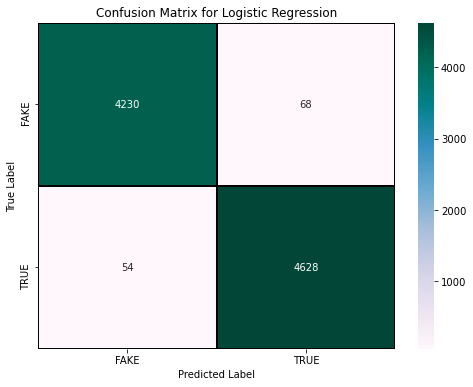

In [27]:
cm = confusion_matrix(X_test_prediction, Y_test)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuBuGn", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')

In [28]:
pred_prob1 = model.predict_proba(X_test)

from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr1, p_tpr1, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [29]:
# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
print(auc_score1)

0.9990110183766863


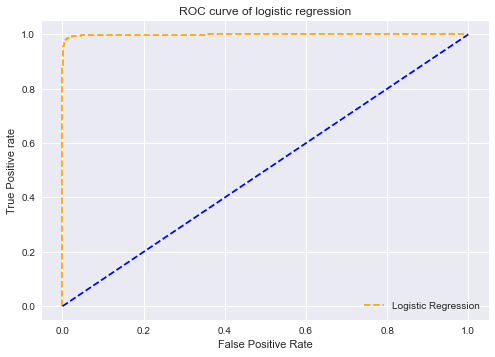

In [30]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr1, p_tpr1, linestyle='--', color='blue')
# title
plt.title('ROC curve of logistic regression')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show();

### Random Forest

In [32]:
clf=RandomForestClassifier(n_estimators=100)

In [33]:
clf.fit(X_train, Y_train)
y_predection=clf.predict(X_test)
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_predection))

Accuracy score of the test data :  0.9918708240534521


In [34]:
print('Precision = ', precision_score(y_predection, Y_test))
print('Recall = ', recall_score(y_predection, Y_test))
print('f1_score = ', f1_score(y_predection, Y_test))

Precision =  0.9899914821124361
Recall =  0.9944385026737967
f1_score =  0.9922100096040977


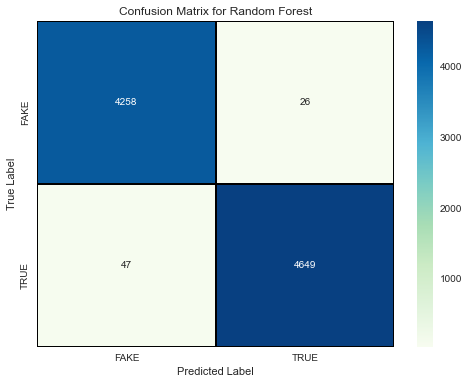

In [35]:
cm = confusion_matrix(Y_test,y_predection)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "GnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')

In [36]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr2, p_tpr2, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob2 = clf.predict_proba(X_test)

fpr2, tpr2, thresh1 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
# auc scores
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
print(auc_score2)

0.9996487912314274


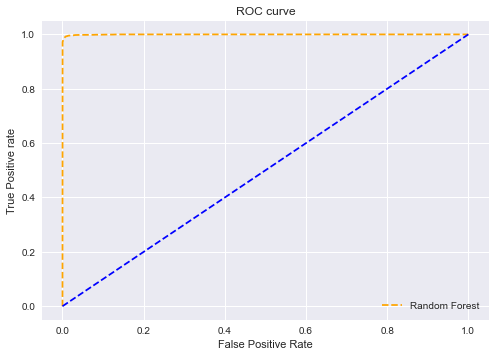

In [37]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show();

### XGBOOST

In [88]:
xgb = XGBClassifier()

In [89]:
tfidf = xgb.fit(X_train,Y_train)

C:\Users\ASUS1\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [90]:
tfidf_val_predict = tfidf.predict( X_test)
print('Accuracy score of the test data : ',accuracy_score(Y_test, tfidf_val_predict))

Accuracy score of the test data :  0.9984409799554566


In [91]:
print('Precision = ', precision_score(tfidf_val_predict, Y_test))
print('Recall = ', recall_score(tfidf_val_predict, Y_test))
print('f1_score = ', f1_score(tfidf_val_predict, Y_test))


Precision =  0.9985093696763203
Recall =  0.9985093696763203
f1_score =  0.9985093696763203


Text(0.5, 1.0, 'Confusion Matrix for Xgboost')

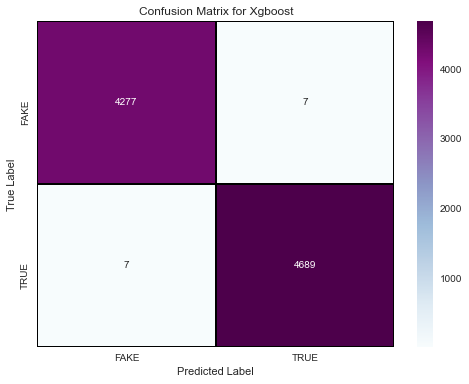

In [92]:
cm = confusion_matrix(Y_test, tfidf_val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "BuPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Xgboost')


In [93]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr3, p_tpr3, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob3 = xgb.predict_proba(X_test)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
# auc scores
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])
print(auc_score3)

0.999877744254999


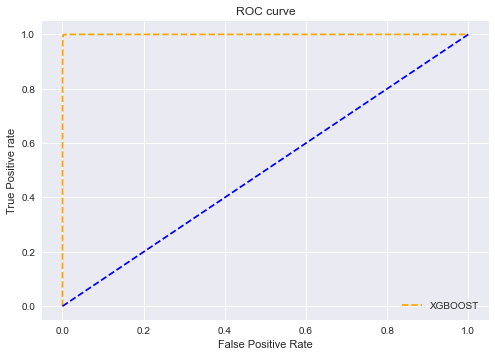

In [94]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='XGBOOST')

plt.plot(p_fpr3, p_tpr3, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### SVM

In [47]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [48]:
y_pred2 = clf.predict(X_test)
SVM=metrics.accuracy_score(Y_test, y_pred2)
print(accuracy_score(Y_test,y_pred2))

0.9937639198218263


In [49]:
print('Accuracy score of the test data : ',accuracy_score(Y_test,y_pred2))

Accuracy score of the test data :  0.9937639198218263


In [50]:
print('Precision = ', precision_score(y_pred2, Y_test))
print('Recall = ', recall_score(y_pred2, Y_test))
print('f1_score = ', f1_score(y_pred2, Y_test))

Precision =  0.9931856899488927
Recall =  0.9948805460750854
f1_score =  0.9940323955669224


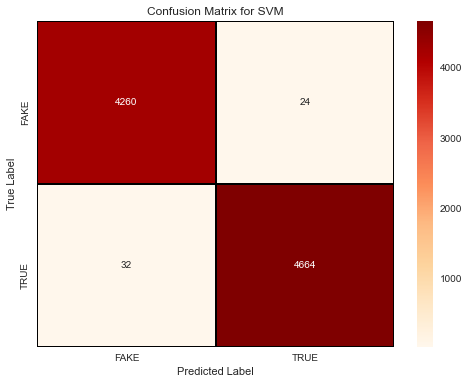

In [51]:
cm = confusion_matrix(Y_test,y_pred2)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "OrRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')

In [52]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr4, p_tpr4, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob4 = clf.predict_proba(X_test)


fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)
# auc scores
auc_score4 = roc_auc_score(Y_test, pred_prob4[:,1])
print(auc_score4)


0.9997164929288013


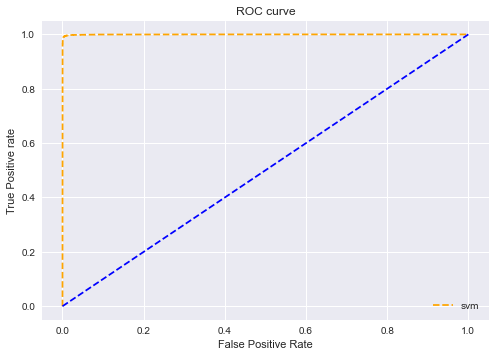

In [53]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='svm')
plt.plot(p_fpr4, p_tpr4, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### Naive Bayes

In [54]:
nb = MultinomialNB()

In [55]:
nb.fit(X_train, Y_train)

MultinomialNB()

In [56]:
predictions = nb.predict(X_test)

In [57]:
print('Accuracy score of the test data : ',accuracy_score(Y_test,predictions))

Accuracy score of the test data :  0.9320712694877505


In [58]:
print('Precision = ', precision_score(predictions, Y_test))
print('Recall = ', recall_score(predictions, Y_test))
print('f1_score = ', f1_score(predictions, Y_test))

Precision =  0.9403747870528109
Recall =  0.9304677623261695
f1_score =  0.9353950434230037


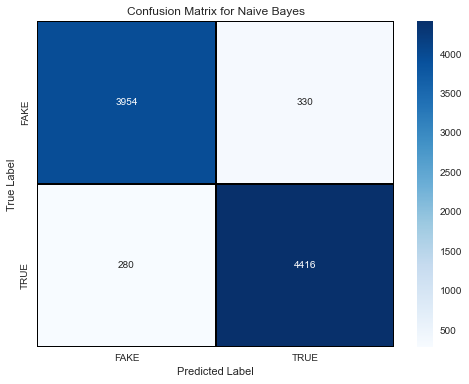

In [59]:
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, predictions)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes')


In [60]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr5, p_tpr5, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob5 = nb.predict_proba(X_test)
fpr5, tpr5, thresh5 = roc_curve(Y_test, pred_prob5[:,1], pos_label=1)
# auc scores
auc_score5 = roc_auc_score(Y_test, pred_prob5[:,1])
print(auc_score5)

0.9793594822937692


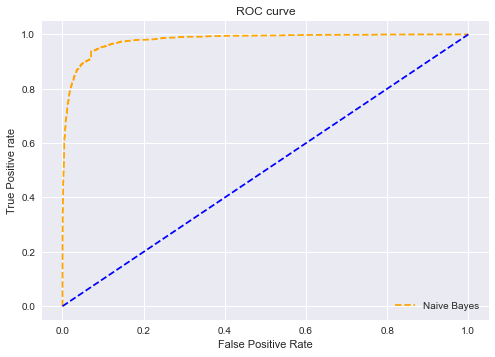

In [61]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr5, tpr5, linestyle='--',color='orange', label='Naive Bayes')

plt.plot(p_fpr5, p_tpr5, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### ADABOOST

In [63]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [64]:
model = abc.fit(X_train, Y_train)


In [65]:
y_pred4 = model.predict(X_test)

In [66]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred4))

Accuracy score of the test data :  0.9967706013363029


In [67]:
print('Precision = ', precision_score(y_pred4, Y_test))
print('Recall = ', recall_score(y_pred4, Y_test))
print('f1_score = ', f1_score(y_pred4, Y_test))

Precision =  0.9953151618398637
Recall =  0.9985045930356762
f1_score =  0.9969073264370268


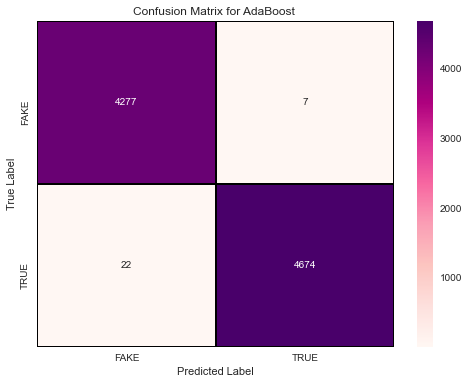

In [68]:
cm = confusion_matrix(Y_test,y_pred4)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "RdPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost ')

In [69]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr6, p_tpr6, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob6 = abc.predict_proba(X_test)

fpr6, tpr6, thresh6 = roc_curve(Y_test, pred_prob6[:,1], pos_label=1)
from sklearn.metrics import roc_auc_score
# auc scores
auc_score6 = roc_auc_score(Y_test, pred_prob6[:,1])
print(auc_score6)

0.9997206932176619


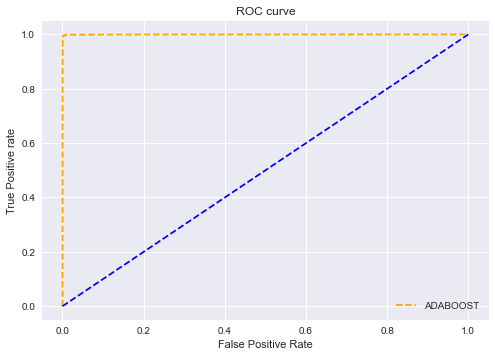

In [70]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='ADABOOST')
plt.plot(p_fpr6, p_tpr6, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### Decision Tree

In [72]:
dt = DecisionTreeClassifier()

In [73]:
dt = dt.fit(X_train,Y_train)

In [74]:
y_pred5 = dt.predict(X_test)

In [75]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred5))

Accuracy score of the test data :  0.9971046770601336


In [76]:
print('Precision = ', precision_score(y_pred5, Y_test))
print('Recall = ', recall_score(y_pred5, Y_test))
print('f1_score = ', f1_score(y_pred5, Y_test))

Precision =  0.9974446337308348
Recall =  0.9970200085142614
f1_score =  0.9972322759208005


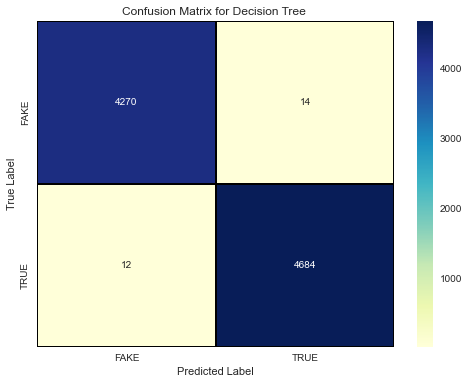

In [77]:
cm = confusion_matrix(Y_test,y_pred5)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "YlGnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree ')

In [78]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr7, p_tpr7, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob7 = dt.predict_proba(X_test)

fpr7, tpr7, thresh7 = roc_curve(Y_test, pred_prob7[:,1], pos_label=1)
# auc scores
auc_score7 = roc_auc_score(Y_test, pred_prob7[:,1])
print(auc_score7)

0.9970406603868123


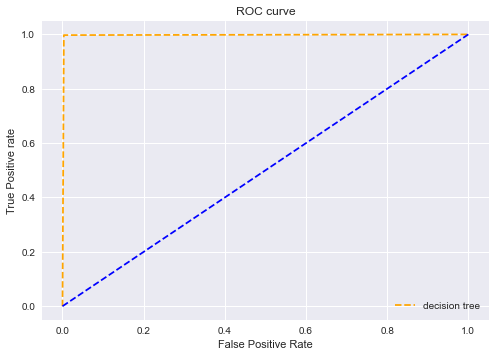

In [79]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr7, tpr7, linestyle='--',color='orange', label='decision tree')

plt.plot(p_fpr7, p_tpr7, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc  of decision tree ',dpi=300)
plt.show();

 # k-Nearest Neighbor

In [81]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [82]:
y_pred6 = classifier.predict(X_test)

In [83]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred6))

Accuracy score of the test data :  0.6959910913140311


In [84]:
print('Precision = ', precision_score(y_pred6, Y_test))
print('Recall = ', recall_score(y_pred6, Y_test))
print('f1_score = ', f1_score(y_pred6, Y_test))

Precision =  0.9757240204429302
Recall =  0.6365657126979717
f1_score =  0.7704725071464603


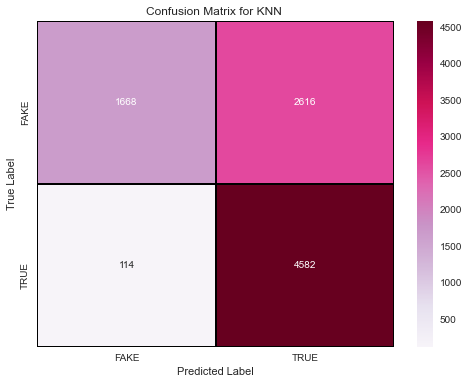

In [85]:
cm = confusion_matrix(Y_test,y_pred6)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN ')

In [86]:
pred_prob9 = classifier.predict_proba(X_test)

fpr9, tpr9, thresh9 = roc_curve(Y_test, pred_prob9[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr9, p_tpr9, _ = roc_curve(Y_test, random_probs, pos_label=1)
# auc scores
auc_score9 = roc_auc_score(Y_test, pred_prob9[:,1])
print(auc_score9)

0.7880681872408247


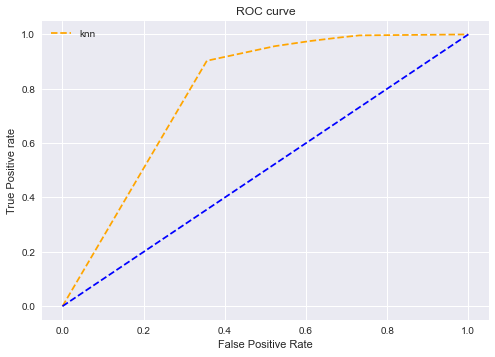

In [87]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr9, tpr9, linestyle='--',color='orange', label='knn')

plt.plot(p_fpr9, p_tpr9, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc of knn ',dpi=300)
plt.show();

#### A Comparison of Algorithms with TfidfVectorizer()

In [88]:
pip install PrettyTable

Note: you may need to restart the kernel to use updated packages.


In [90]:
Logistic_Regression =roc_auc_score(Y_test, X_test_prediction)
Random_Forest =roc_auc_score(Y_test, y_predection)
XGBOOST =roc_auc_score(Y_test, tfidf_val_predict)
SVM =roc_auc_score(Y_test, y_pred2)
Naive_Bayes =roc_auc_score(Y_test, predictions)
ADABOOST =roc_auc_score(Y_test, y_pred4)
Dt =roc_auc_score(Y_test, y_pred5)
knn= roc_auc_score(Y_test,y_pred6)

In [91]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Logistic_Regression Algorithm", round(Logistic_Regression,4)])
x.add_row(["Random_Forest Algorithm", round(Random_Forest,4)])
x.add_row(["XGBOOST Algorithm", round(XGBOOST,4)])
x.add_row(["SVM Algorithm", round(SVM,4)])
x.add_row(["Naive_Bayes Algorithm ", round(Naive_Bayes,4)])
x.add_row(["ADABOOST Algorithm", round(ADABOOST,4)])
x.add_row(["Dt Algorithm", round(Dt,4)])
x.add_row(["knn Algorithm", round(knn,4)])

print(x)
print('\n')



Comparison of all algorithm results
+-------------------------------+----------+
|             Model             | Accuracy |
+-------------------------------+----------+
| Logistic_Regression Algorithm |  0.9865  |
|    Random_Forest Algorithm    |  0.992   |
|       XGBOOST Algorithm       |  0.9987  |
|         SVM Algorithm         |  0.9938  |
|     Naive_Bayes Algorithm     |  0.9317  |
|       ADABOOST Algorithm      |  0.9968  |
|          Dt Algorithm         |  0.9971  |
|         knn Algorithm         |  0.6825  |
+-------------------------------+----------+




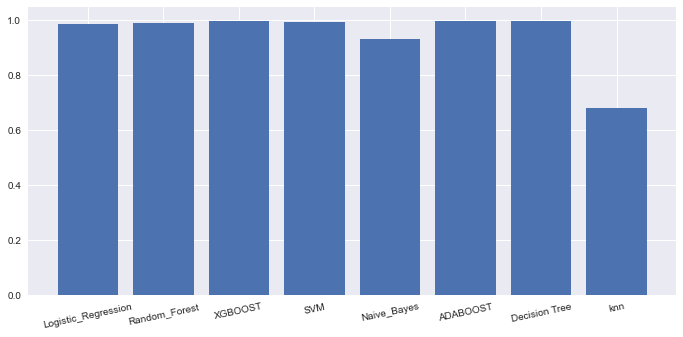

In [92]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
models = ['Logistic_Regression', 'Random_Forest', 'XGBOOST', 'SVM', 'Naive_Bayes', 'ADABOOST', 'Decision Tree', 'knn']
acc = [Logistic_Regression, Random_Forest , XGBOOST,  SVM , Naive_Bayes,ADABOOST ,Dt , knn]
plt.xticks(rotation=12)
ax.bar(models,acc)
plt.show()

In [93]:
# calculate ROC curves
lgr_fpr, lgr_tpr, _ = roc_curve(Y_test, X_test_prediction)
rdf_fpr, rdf_tpr, _ = roc_curve(Y_test, y_predection)
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test, tfidf_val_predict)
svm_fpr, svm_tpr, _ = roc_curve(Y_test, y_pred2)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, predictions)
ada_fpr, ada_tpr, _ = roc_curve(Y_test, y_pred4)
dt_fpr, dt_tpr, _ = roc_curve(Y_test, y_pred5)
knn_fpr, knn_tpr, _ = roc_curve(Y_test,y_pred6)

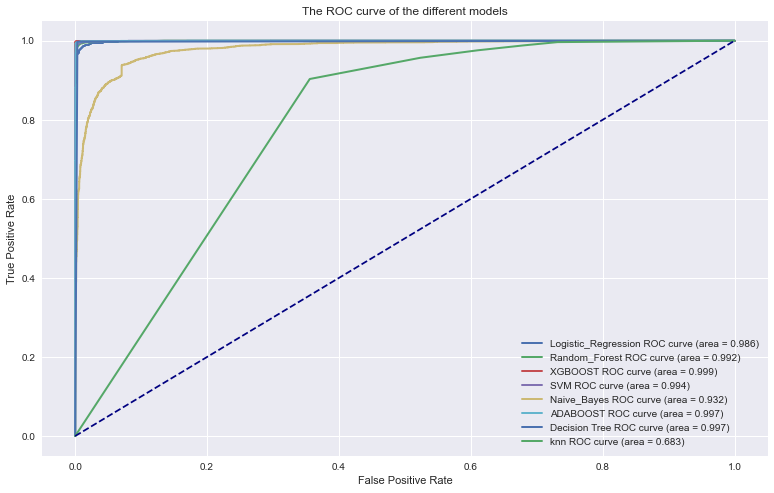

In [94]:
lw =2
plt.figure(figsize = (13,8))
plt.plot(fpr1, tpr1, lw = lw, label='Logistic_Regression ROC curve (area = %0.3f)' % Logistic_Regression)
plt.plot(fpr2, tpr2, lw = lw, label='Random_Forest ROC curve (area = %0.3f)' % Random_Forest)
plt.plot(fpr3, tpr3,  lw = lw, label='XGBOOST ROC curve (area = %0.3f)' % XGBOOST)
plt.plot(fpr4, tpr4, lw=lw,  label='SVM ROC curve (area = %0.3f)' % SVM)
plt.plot(fpr5, tpr5,  lw = lw, label='Naive_Bayes ROC curve (area = %0.3f)' % Naive_Bayes)
plt.plot(fpr6, tpr6,  lw = lw, label='ADABOOST ROC curve (area = %0.3f)' % ADABOOST)
plt.plot(fpr7, tpr7, lw=lw,  label='Decision Tree ROC curve (area = %0.3f)' % Dt)
plt.plot(fpr9, tpr9,  lw = lw, label='knn ROC curve (area = %0.3f)' % knn)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('The ROC curve of the different models')

plt.legend()
plt.show()

### - CountVectorizer()

In [95]:
count_vect = CountVectorizer()
x = count_vect.fit_transform(X)

In [96]:
print(x)

  (0, 69384)	1
  (0, 48575)	1
  (0, 15107)	1
  (0, 7971)	5
  (0, 11877)	1
  (0, 73682)	1
  (0, 43342)	1
  (0, 33611)	2
  (0, 25690)	1
  (0, 77572)	1
  (0, 44378)	2
  (0, 35704)	1
  (0, 624)	2
  (0, 17752)	2
  (0, 69427)	2
  (0, 1105)	2
  (0, 2573)	2
  (0, 64682)	2
  (0, 5922)	2
  (0, 43365)	5
  (0, 10972)	1
  (0, 3952)	1
  (0, 82662)	1
  (0, 61333)	1
  (0, 18416)	1
  :	:
  (44897, 74239)	1
  (44897, 33548)	1
  (44897, 9999)	2
  (44897, 69080)	1
  (44897, 48368)	1
  (44897, 59712)	1
  (44897, 14787)	3
  (44897, 40330)	1
  (44897, 24086)	1
  (44897, 27877)	1
  (44897, 23371)	1
  (44897, 14567)	1
  (44897, 78190)	1
  (44897, 8376)	2
  (44897, 72828)	2
  (44897, 18212)	1
  (44897, 48840)	2
  (44897, 17979)	1
  (44897, 18160)	1
  (44897, 61098)	1
  (44897, 63892)	1
  (44897, 52447)	3
  (44897, 37640)	1
  (44897, 73950)	3
  (44897, 59586)	1


In [97]:
print(x.shape)

(44898, 89633)


In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, stratify=Y, random_state=2)

### Logistic Regression 

In [99]:
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\ASUS1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [101]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9965478841870824


In [102]:
print('Precision = ', precision_score(X_test_prediction, Y_test))
print('Recall = ', recall_score(X_test_prediction, Y_test))
print('f1_score = ', f1_score(X_test_prediction, Y_test))

Precision =  0.9968057921635435
Recall =  0.9965935703640622
f1_score =  0.9966996699669968


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

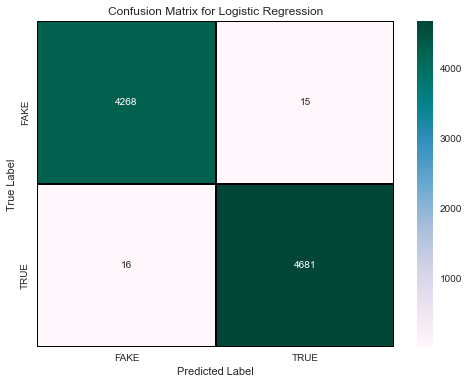

In [103]:
cm = confusion_matrix(X_test_prediction, Y_test)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuBuGn", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')


In [104]:
# logistic regression
model1 = LogisticRegression()
# fit model
model1.fit(X_train, Y_train)
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)

C:\Users\ASUS1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr1, p_tpr1, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
print(auc_score1)

0.9990009774494691


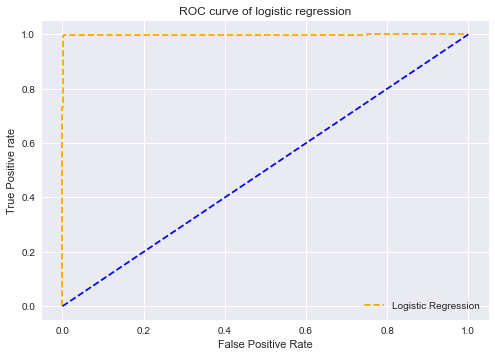

In [106]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr1, p_tpr1, linestyle='--', color='blue')
# title
plt.title('ROC curve of logistic regression')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

### Random Forest

In [107]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [108]:
y_predection=clf.predict(X_test)

In [109]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_predection))

Accuracy score of the test data :  0.9910913140311804


In [110]:
print('Precision = ', precision_score(y_predection, Y_test))
print('Recall = ', recall_score(y_predection, Y_test))
print('f1_score = ', f1_score(y_predection, Y_test))

Precision =  0.9891396933560477
Recall =  0.9937954642704322
f1_score =  0.9914621131270012


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

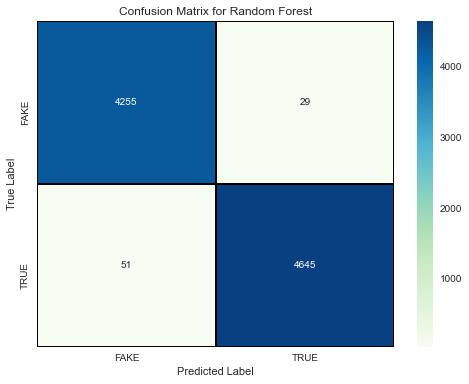

In [111]:
cm = confusion_matrix(Y_test,y_predection)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "GnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')

In [112]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr2, p_tpr2, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob2 = clf.predict_proba(X_test)

fpr2, tpr2, thresh1 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
# auc scores
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
print(auc_score2)

0.9996853014345999


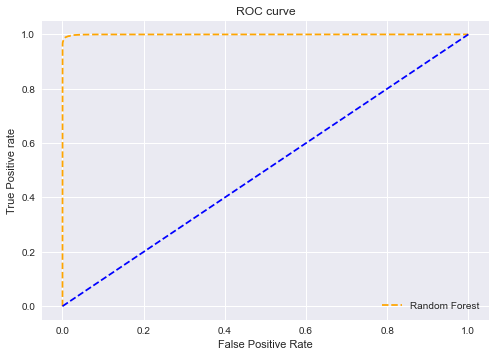

In [113]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

### XGBOOST

In [99]:
xgb = XGBClassifier()
xgb_count= xgb.fit(X_train,Y_train)

C:\Users\ASUS1\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [100]:
val_predict =xgb_count.predict( X_test)
print('Accuracy score of the test data : ',accuracy_score(Y_test, val_predict))

Accuracy score of the test data :  0.9984409799554566


In [101]:
print('Precision = ', precision_score(val_predict, Y_test))
print('Recall = ', recall_score(val_predict, Y_test))
print('f1_score = ', f1_score(val_predict, Y_test))

Precision =  0.9989352640545145
Recall =  0.9980851063829788
f1_score =  0.9985100042571308


Text(0.5, 1.0, 'Confusion Matrix for Xgboost')

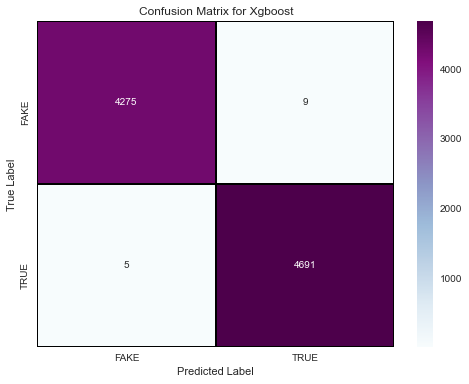

In [102]:
cm = confusion_matrix(Y_test, val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "BuPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Xgboost')


In [103]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr3, p_tpr3, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob3 = xgb.predict_proba(X_test)

fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
# auc scores
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])
print(auc_score3)

0.9999173860344819


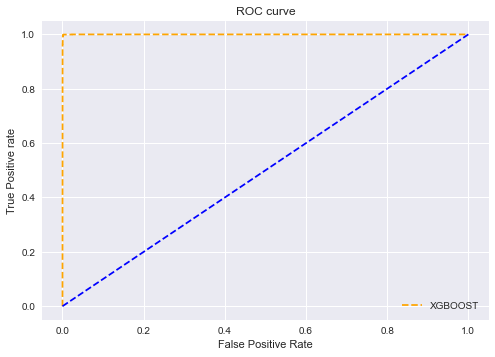

In [104]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='XGBOOST')

plt.plot(p_fpr3, p_tpr3, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### SVM

In [120]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [121]:
y_pred2 = clf.predict(X_test)
SVM=metrics.accuracy_score(Y_test, y_pred2)

In [122]:
print('Accuracy score of the test data : ',accuracy_score(Y_test,y_pred2))

Accuracy score of the test data :  0.9957683741648107


In [123]:
print('Precision = ', precision_score(y_pred2, Y_test))
print('Recall = ', recall_score(y_pred2, Y_test))
print('f1_score = ', f1_score(y_pred2, Y_test))

Precision =  0.995741056218058
Recall =  0.9961653174265019
f1_score =  0.9959531416400427


Text(0.5, 1.0, 'Confusion Matrix for SVM')

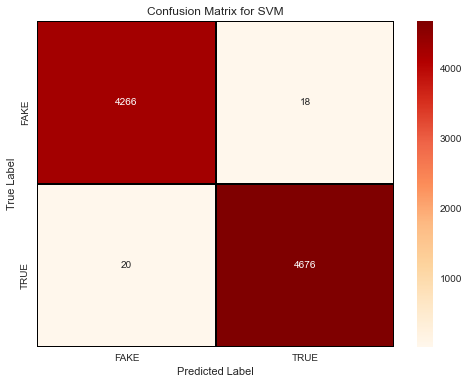

In [124]:
cm = confusion_matrix(Y_test,y_pred2)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "OrRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')


In [125]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr4, p_tpr4, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob4 = clf.predict_proba(X_test)

fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)
# auc scores
auc_score4 = roc_auc_score(Y_test, pred_prob4[:,1])
print(auc_score4)

0.9989922786263852


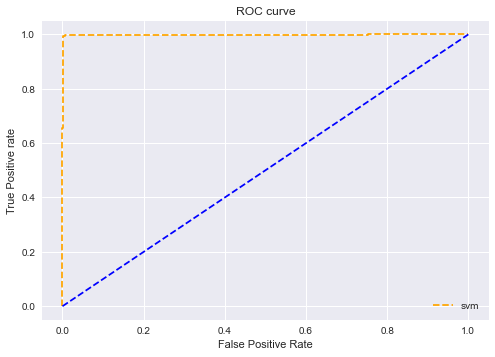

In [126]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='svm')
plt.plot(p_fpr4, p_tpr4, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### Naive Bayes

In [127]:
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [128]:
predictions = nb.predict(X_test)
print('Accuracy score of the test data : ',accuracy_score(Y_test,predictions))

Accuracy score of the test data :  0.950445434298441


In [129]:
print('Precision = ', precision_score(predictions, Y_test))
print('Recall = ', recall_score(predictions, Y_test))
print('f1_score = ', f1_score(predictions, Y_test))

Precision =  0.9484667802385008
Recall =  0.9564097058191969
f1_score =  0.9524216828824976


Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

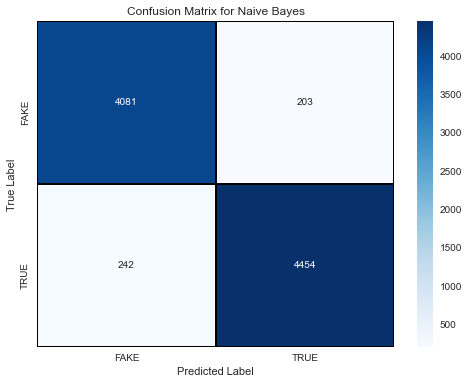

In [130]:
cm = confusion_matrix(Y_test, predictions)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes')


In [131]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr5, p_tpr5, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob5 = nb.predict_proba(X_test)

fpr5, tpr5, thresh5 = roc_curve(Y_test, pred_prob5[:,1], pos_label=1)
# auc scores
auc_score5 = roc_auc_score(Y_test, pred_prob5[:,1])
print(auc_score5)


0.9764172917889473


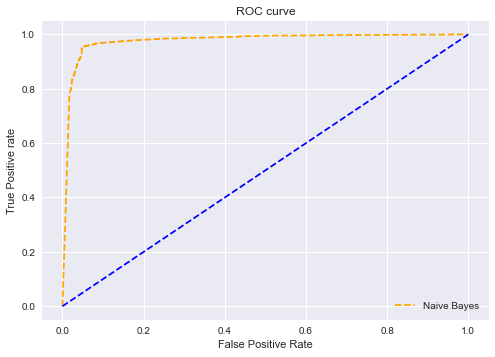

In [132]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr5, tpr5, linestyle='--',color='orange', label='Naive Bayes')

plt.plot(p_fpr5, p_tpr5, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### ADABOOST

In [133]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [134]:
model = abc.fit(X_train, Y_train)
y_pred4 = model.predict(X_test)
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred4))

Accuracy score of the test data :  0.9969933184855234


In [135]:
print('Precision = ', precision_score(y_pred4, Y_test))
print('Recall = ', recall_score(y_pred4, Y_test))
print('f1_score = ', f1_score(y_pred4, Y_test))

Precision =  0.9961669505962522
Recall =  0.9980797951781524
f1_score =  0.9971224555046361


Text(0.5, 1.0, 'Confusion Matrix for AdaBoost ')

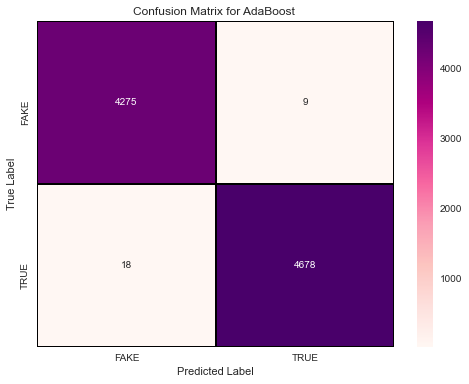

In [136]:
cm = confusion_matrix(Y_test,y_pred4)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "RdPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost ')


In [137]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr6, p_tpr6, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob6 = abc.predict_proba(X_test)

fpr6, tpr6, thresh6 = roc_curve(Y_test, pred_prob6[:,1], pos_label=1)
# auc scores
auc_score6 = roc_auc_score(Y_test, pred_prob6[:,1])
print(auc_score6)

0.9999046111914386


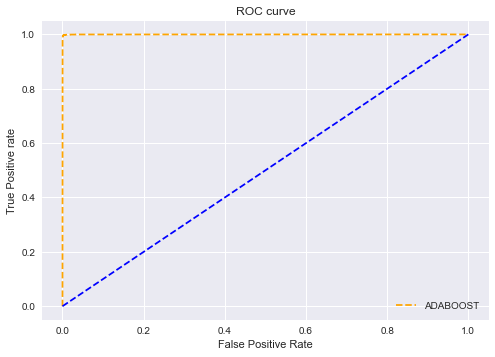

In [138]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='ADABOOST')
plt.plot(p_fpr6, p_tpr6, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### Decision Tree

In [139]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,Y_train)
y_pred5 = dt.predict(X_test)

In [140]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred5))

Accuracy score of the test data :  0.9974387527839643


In [141]:
print('Precision = ', precision_score(y_pred5, Y_test))
print('Recall = ', recall_score(y_pred5, Y_test))
print('f1_score = ', f1_score(y_pred5, Y_test))

Precision =  0.997870528109029
Recall =  0.9972334539263673
f1_score =  0.9975518893028206


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree ')

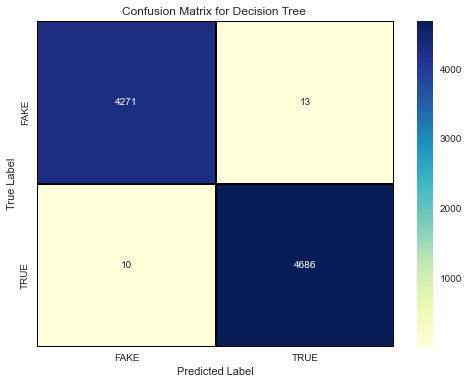

In [143]:
cm = confusion_matrix(Y_test,y_pred5)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "YlGnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree ')

In [ ]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr7, p_tpr7, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob7 = dt.predict_proba(X_test)

fpr7, tpr7, thresh7 = roc_curve(Y_test, pred_prob7[:,1], pos_label=1)
# auc scores
auc_score7 = roc_auc_score(Y_test, pred_prob7[:,1])
print(auc_score7)

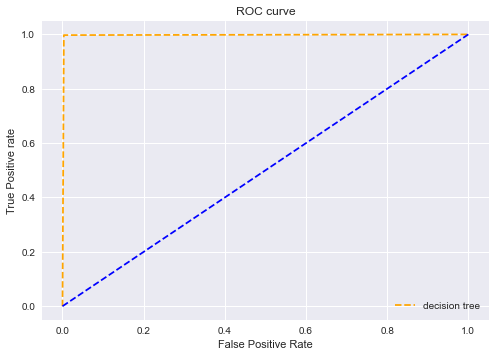

In [144]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr7, tpr7, linestyle='--',color='orange', label='decision tree')

plt.plot(p_fpr7, p_tpr7, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### k-Nearest Neighbor

In [145]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)
y_pred6 = classifier.predict(X_test)

In [146]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred6))

Accuracy score of the test data :  0.7925389755011136


In [147]:
print('Precision = ', precision_score(y_pred6, Y_test))
print('Recall = ', recall_score(y_pred6, Y_test))
print('f1_score = ', f1_score(y_pred6, Y_test))

Precision =  0.7591567291311755
Recall =  0.8296485920409588
f1_score =  0.7928388746803069


Text(0.5, 1.0, 'Confusion Matrix for KNN ')

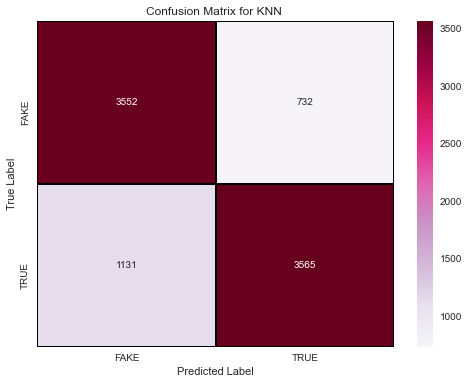

In [148]:
cm = confusion_matrix(Y_test,y_pred6)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN ')


In [149]:
pred_prob9 = classifier.predict_proba(X_test)


fpr9, tpr9, thresh9 = roc_curve(Y_test, pred_prob9[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr9, p_tpr9, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
auc_score9 = roc_auc_score(Y_test, pred_prob9[:,1])
print(auc_score9)

0.868288311207504


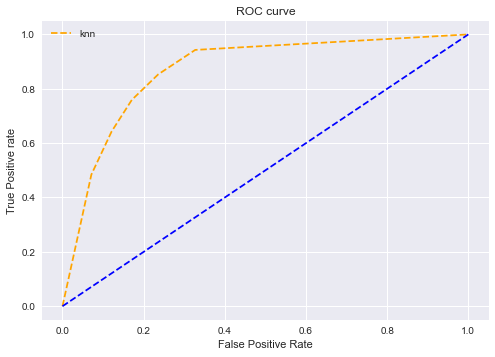

In [150]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr9, tpr9, linestyle='--',color='orange', label='knn')

plt.plot(p_fpr9, p_tpr9, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

#### A Comparison of Algorithms with CountVectorizer()

In [151]:
Logistic_Regression =roc_auc_score(Y_test, X_test_prediction)
Random_Forest =roc_auc_score(Y_test, y_predection)
XGBOOST =roc_auc_score(Y_test, tfidf_val_predict)
SVM =roc_auc_score(Y_test, y_pred2)
Naive_Bayes =roc_auc_score(Y_test, predictions)
ADABOOST =roc_auc_score(Y_test, y_pred4)
Dt =roc_auc_score(Y_test, y_pred5)
knn= roc_auc_score(Y_test,y_pred6)

In [152]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Logistic_Regression Algorithm", round(Logistic_Regression,4)])
x.add_row(["Random_Forest Algorithm", round(Random_Forest,4)])
x.add_row(["XGBOOST Algorithm", round(XGBOOST,4)])
x.add_row(["SVM Algorithm", round(SVM,4)])
x.add_row(["Naive_Bayes Algorithm ", round(Naive_Bayes,4)])
x.add_row(["ADABOOST Algorithm", round(ADABOOST,4)])
x.add_row(["Dt Algorithm", round(Dt,4)])
x.add_row(["knn Algorithm", round(knn,4)])

print(x)
print('\n')



Comparison of all algorithm results
+-------------------------------+----------+
|             Model             | Accuracy |
+-------------------------------+----------+
| Logistic_Regression Algorithm |  0.9965  |
|    Random_Forest Algorithm    |  0.9912  |
|       XGBOOST Algorithm       |  0.9984  |
|         SVM Algorithm         |  0.9958  |
|     Naive_Bayes Algorithm     |  0.9505  |
|       ADABOOST Algorithm      |  0.997   |
|          Dt Algorithm         |  0.9974  |
|         knn Algorithm         |  0.7941  |
+-------------------------------+----------+




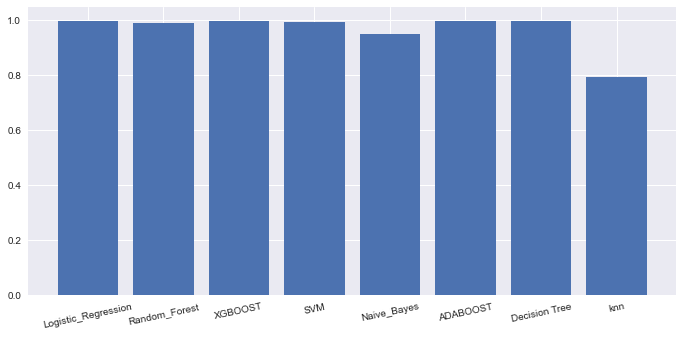

In [153]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
models = ['Logistic_Regression', 'Random_Forest', 'XGBOOST', 'SVM', 'Naive_Bayes', 'ADABOOST', 'Decision Tree', 'knn']
acc = [Logistic_Regression, Random_Forest , XGBOOST,  SVM , Naive_Bayes,ADABOOST ,Dt , knn]
plt.xticks(rotation=12)
ax.bar(models,acc)
plt.show()

In [154]:
# calculate ROC curves
lgr_fpr, lgr_tpr, _ = roc_curve(Y_test, X_test_prediction)
rdf_fpr, rdf_tpr, _ = roc_curve(Y_test, y_predection)
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test, tfidf_val_predict)
svm_fpr, svm_tpr, _ = roc_curve(Y_test, y_pred2)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, predictions)
ada_fpr, ada_tpr, _ = roc_curve(Y_test, y_pred4)
dt_fpr, dt_tpr, _ = roc_curve(Y_test, y_pred5)
knn_fpr, knn_tpr, _ = roc_curve(Y_test,y_pred6)

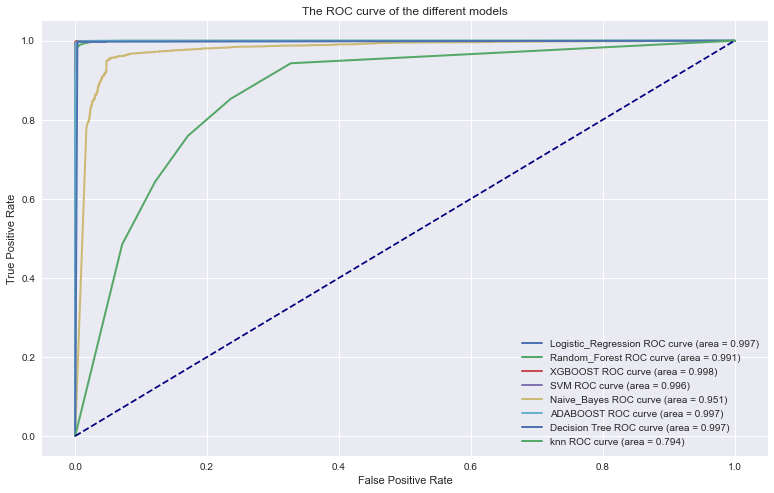

In [155]:
lw =2
plt.figure(figsize = (13,8))
plt.plot(fpr1, tpr1, lw = lw, label='Logistic_Regression ROC curve (area = %0.3f)' % Logistic_Regression)
plt.plot(fpr2, tpr2, lw = lw, label='Random_Forest ROC curve (area = %0.3f)' % Random_Forest)
plt.plot(fpr3, tpr3,  lw = lw, label='XGBOOST ROC curve (area = %0.3f)' % XGBOOST)
plt.plot(fpr4, tpr4, lw=lw,  label='SVM ROC curve (area = %0.3f)' % SVM)
plt.plot(fpr5, tpr5,  lw = lw, label='Naive_Bayes ROC curve (area = %0.3f)' % Naive_Bayes)
plt.plot(fpr6, tpr6,  lw = lw, label='ADABOOST ROC curve (area = %0.3f)' % ADABOOST)
plt.plot(fpr7, tpr7, lw=lw,  label='Decision Tree ROC curve (area = %0.3f)' % Dt)
plt.plot(fpr9, tpr9,  lw = lw, label='knn ROC curve (area = %0.3f)' % knn)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('The ROC curve of the different models')
plt.legend()
plt.show()

### - HashingVectorizer() 

In [105]:
X = np.array(news_dataset['text'])
vectorizer = HashingVectorizer()
vector = vectorizer.transform(X)
print(vector.shape)
print(vector.toarray())
#to dataframe
dft=pd.DataFrame.sparse.from_spmatrix(vector)

(44898, 1048576)


MemoryError: Unable to allocate 351. GiB for an array with shape (44898, 1048576) and data type float64

In [106]:
print(vector)

  (0, 864)	0.11414602910706992
  (0, 2860)	0.05707301455353496
  (0, 2862)	-0.05707301455353496
  (0, 18469)	0.11414602910706992
  (0, 29439)	0.05707301455353496
  (0, 30985)	-0.05707301455353496
  (0, 38719)	0.05707301455353496
  (0, 60869)	-0.05707301455353496
  (0, 61785)	0.05707301455353496
  (0, 66007)	0.05707301455353496
  (0, 71053)	-0.1712190436606049
  (0, 72250)	-0.05707301455353496
  (0, 89115)	0.05707301455353496
  (0, 100922)	0.11414602910706992
  (0, 109625)	-0.11414602910706992
  (0, 153259)	0.05707301455353496
  (0, 158803)	-0.05707301455353496
  (0, 162096)	0.05707301455353496
  (0, 187212)	-0.05707301455353496
  (0, 192620)	0.05707301455353496
  (0, 215875)	-0.05707301455353496
  (0, 228212)	0.05707301455353496
  (0, 230046)	-0.05707301455353496
  (0, 231055)	0.05707301455353496
  (0, 237056)	0.05707301455353496
  :	:
  (44897, 511733)	0.07715167498104596
  (44897, 519569)	0.07715167498104596
  (44897, 522926)	0.3086066999241838
  (44897, 550842)	0.07715167498104596
 

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(vector, Y, test_size = 0.2, stratify=Y, random_state=2)

### LogisticRegression

In [178]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [179]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [180]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9903118040089087


In [181]:
print('Precision = ', precision_score(X_test_prediction, Y_test))
print('Recall = ', recall_score(X_test_prediction, Y_test))
print('f1_score = ', f1_score(X_test_prediction, Y_test))

Precision =  0.989778534923339
Recall =  0.9916791124386601
f1_score =  0.990727912181605


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

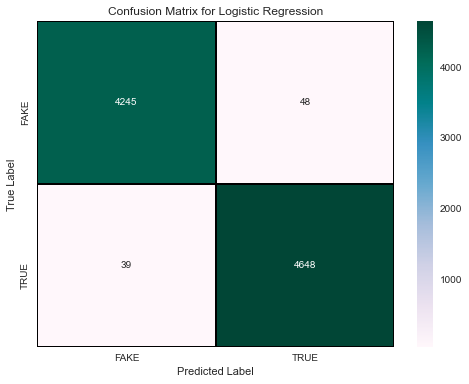

In [182]:
cm = confusion_matrix(X_test_prediction, Y_test)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuBuGn", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')


In [183]:
# predict probabilities
pred_prob1 = model.predict_proba(X_test)

In [184]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr1, p_tpr1, _ = roc_curve(Y_test, random_probs, pos_label=1)
# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
print(auc_score1)


0.9993851671844207


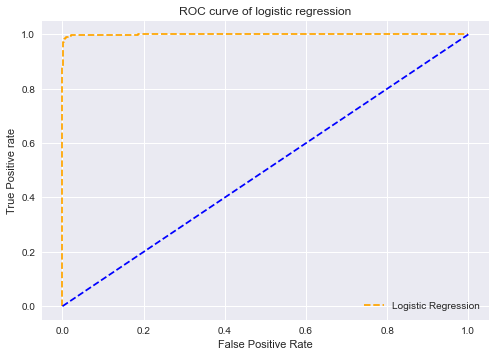

In [185]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr1, p_tpr1, linestyle='--', color='blue')
# title
plt.title('ROC curve of logistic regression')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

### RandomForest

In [186]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [187]:
y_predection=clf.predict(X_test)

In [188]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_predection))

Accuracy score of the test data :  0.9825167037861915


In [189]:
print('Precision = ', precision_score(y_predection, Y_test))
print('Recall = ', recall_score(y_predection, Y_test))
print('f1_score = ', f1_score(y_predection, Y_test))

Precision =  0.981473594548552
Recall =  0.985039538362898
f1_score =  0.9832533333333333


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

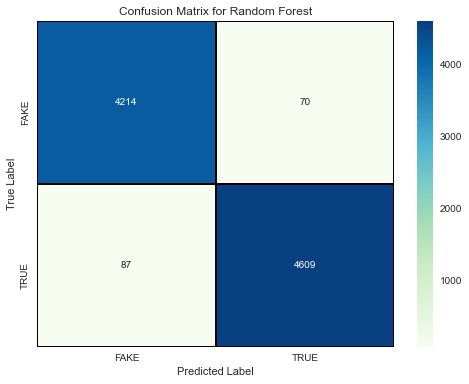

In [190]:
cm = confusion_matrix(Y_test,y_predection)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "GnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')


In [191]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr2, p_tpr2, _ = roc_curve(Y_test, random_probs, pos_label=1)


pred_prob2 = clf.predict_proba(X_test)

fpr2, tpr2, thresh1 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
# auc scores
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
print(auc_score2)

0.9986914733241394


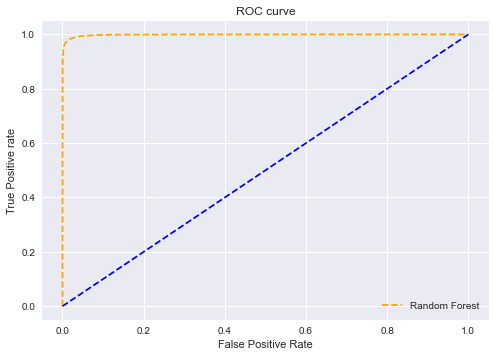

In [192]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

### XGBOOST

In [108]:
xgb = XGBClassifier()
xgb1 = xgb.fit(X_train,Y_train)

C:\Users\ASUS1\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [109]:
val_predict = xgb1.predict( X_test)
print('Accuracy score of the test data : ',accuracy_score(Y_test, val_predict))

Accuracy score of the test data :  0.998218262806236


In [110]:
print('Precision = ', precision_score(val_predict, Y_test))
print('Recall = ', recall_score(val_predict, Y_test))
print('f1_score = ', f1_score(val_predict, Y_test))

Precision =  0.998083475298126
Recall =  0.9985087345547508
f1_score =  0.9982960596379127


Text(0.5, 1.0, 'Confusion Matrix for Xgboost')

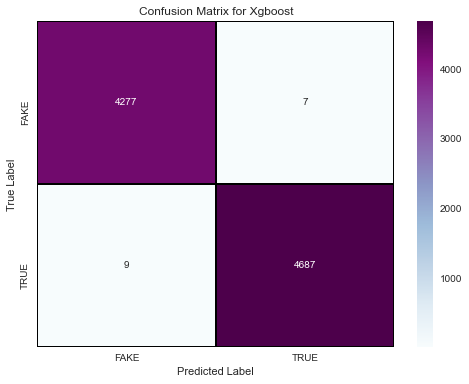

In [111]:
cm = confusion_matrix(Y_test, val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "BuPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Xgboost')

In [112]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr3, p_tpr3, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob3 = xgb.predict_proba(X_test)

fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
# auc scores
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])
print(auc_score3)


0.9998973538876084


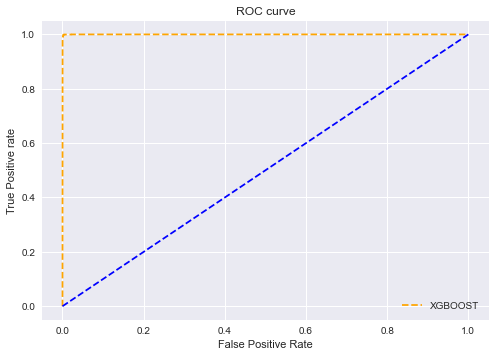

In [113]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='XGBOOST')

plt.plot(p_fpr3, p_tpr3, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### SVM

In [199]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, Y_train)
y_pred2 = clf.predict(X_test)


In [200]:
print('Accuracy score of the test data : ',accuracy_score(Y_test,y_pred2))

Accuracy score of the test data :  0.9956570155902005


In [201]:
print('Precision = ', precision_score(y_pred2, Y_test))
print('Recall = ', recall_score(y_pred2, Y_test))
print('f1_score = ', f1_score(y_pred2, Y_test))

Precision =  0.9942504258943782
Recall =  0.9974364452040162
f1_score =  0.9958408872773808


Text(0.5, 1.0, 'Confusion Matrix for SVM')

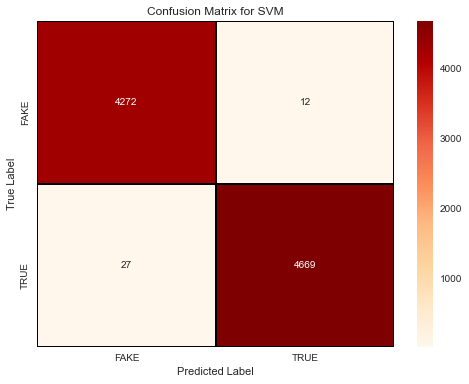

In [202]:
cm = confusion_matrix(Y_test,y_pred2)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "OrRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')

In [203]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr4, p_tpr4, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob4 = clf.predict_proba(X_test)

fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)
# auc scores
auc_score4 = roc_auc_score(Y_test, pred_prob4[:,1])
print(auc_score4)

0.9993927972949544


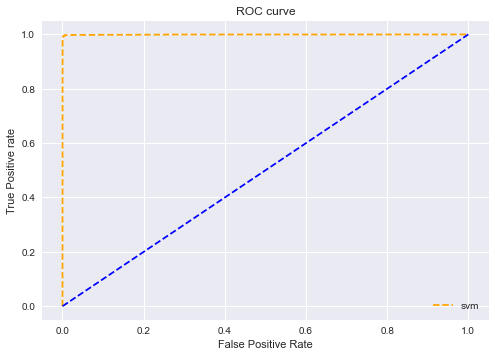

In [204]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='svm')
plt.plot(p_fpr4, p_tpr4, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### ADAboost

In [205]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [206]:
model = abc.fit(X_train, Y_train)
y_pred4 = model.predict(X_test)

In [207]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred4))

Accuracy score of the test data :  0.9967706013363029


In [208]:
print('Precision = ', precision_score(y_pred4, Y_test))
print('Recall = ', recall_score(y_pred4, Y_test))
print('f1_score = ', f1_score(y_pred4, Y_test))

Precision =  0.995954003407155
Recall =  0.9978664390868359
f1_score =  0.996909304060535


Text(0.5, 1.0, 'Confusion Matrix for AdaBoost ')

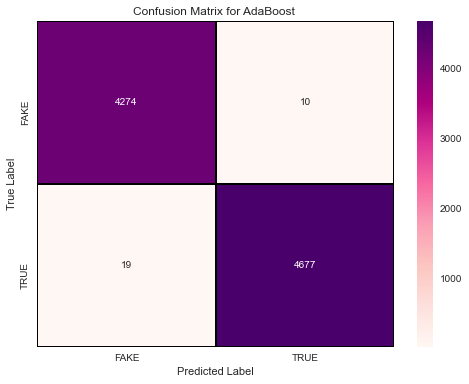

In [209]:
cm = confusion_matrix(Y_test,y_pred4)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "RdPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost ')

In [210]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr6, p_tpr6, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob6 = abc.predict_proba(X_test)

fpr6, tpr6, thresh6 = roc_curve(Y_test, pred_prob6[:,1], pos_label=1)
# auc scores
auc_score6 = roc_auc_score(Y_test, pred_prob6[:,1])
print(auc_score6)

0.9998702135595863


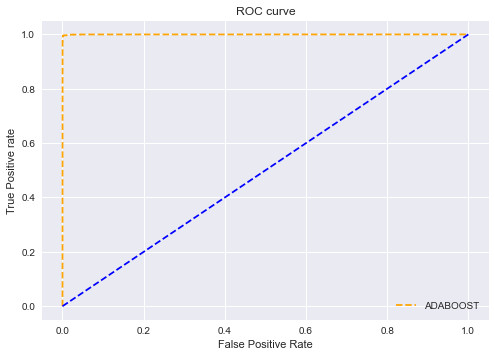

In [211]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='ADABOOST')
plt.plot(p_fpr6, p_tpr6, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### DecisionTree

In [212]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,Y_train)
y_pred5 = dt.predict(X_test)

In [213]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred5))

Accuracy score of the test data :  0.9969933184855234


In [214]:
print('Precision = ', precision_score(y_pred5, Y_test))
print('Recall = ', recall_score(y_pred5, Y_test))
print('f1_score = ', f1_score(y_pred5, Y_test))

Precision =  0.9970187393526405
Recall =  0.997231096911608
f1_score =  0.9971249068256842


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree ')

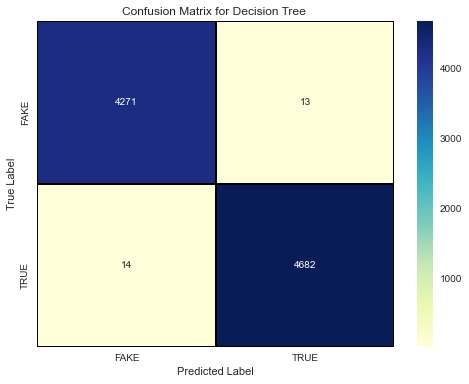

In [215]:
cm = confusion_matrix(Y_test,y_pred5)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "YlGnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree ')

In [216]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr7, p_tpr7, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob7 = dt.predict_proba(X_test)

fpr7, tpr7, thresh7 = roc_curve(Y_test, pred_prob7[:,1], pos_label=1)
# auc scores
auc_score7 = roc_auc_score(Y_test, pred_prob7[:,1])
print(auc_score7)

0.996948800815045


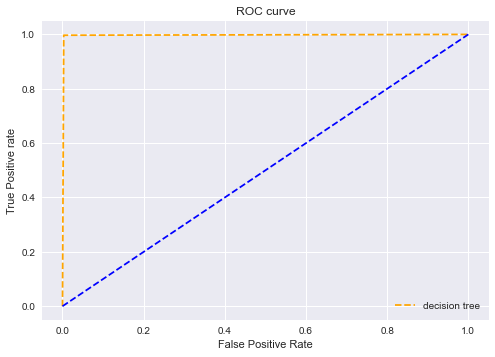

In [217]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr7, tpr7, linestyle='--',color='orange', label='decision tree')

plt.plot(p_fpr7, p_tpr7, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### KNN

In [218]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [219]:
y_pred6 = classifier.predict(X_test)

In [220]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred6))

Accuracy score of the test data :  0.7629175946547884


In [221]:
print('Precision = ', precision_score(y_pred6, Y_test))
print('Recall = ', recall_score(y_pred6, Y_test))
print('f1_score = ', f1_score(y_pred6, Y_test))

Precision =  0.9373935264054515
Recall =  0.7057880391213724
f1_score =  0.8052684533065033


Text(0.5, 1.0, 'Confusion Matrix for KNN ')

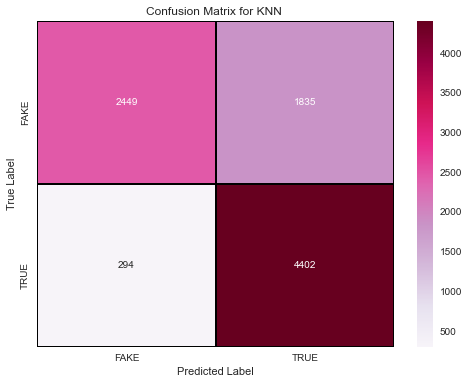

In [222]:
cm = confusion_matrix(Y_test,y_pred6)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN ')

In [223]:
pred_prob9 = classifier.predict_proba(X_test)

fpr9, tpr9, thresh9 = roc_curve(Y_test, pred_prob9[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr9, p_tpr9, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
auc_score9 = roc_auc_score(Y_test, pred_prob9[:,1])
print(auc_score9)

0.8401316375499661


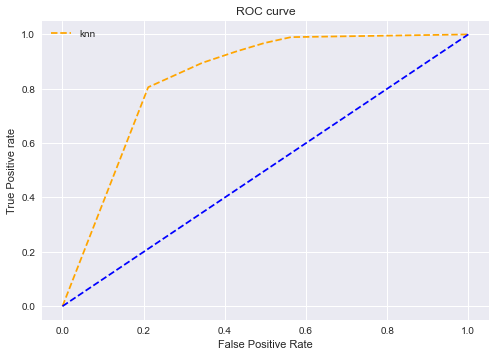

In [224]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr9, tpr9, linestyle='--',color='orange', label='knn')

plt.plot(p_fpr9, p_tpr9, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

#### A Comparison of Algorithms with HashingVectorizer()

In [225]:
Logistic_Regression =roc_auc_score(Y_test, X_test_prediction)
Random_Forest =roc_auc_score(Y_test, y_predection)
XGBOOST =roc_auc_score(Y_test, tfidf_val_predict)
SVM =roc_auc_score(Y_test, y_pred2)
#Naive_Bayes =roc_auc_score(Y_test, predictions)
ADABOOST =roc_auc_score(Y_test, y_pred4)
Dt =roc_auc_score(Y_test, y_pred5)
knn= roc_auc_score(Y_test,y_pred6)

In [226]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Logistic_Regression Algorithm", round(Logistic_Regression,4)])
x.add_row(["Random_Forest Algorithm", round(Random_Forest,4)])
x.add_row(["XGBOOST Algorithm", round(XGBOOST,4)])
x.add_row(["SVM Algorithm", round(SVM,4)])
#x.add_row(["Naive_Bayes Algorithm ", round(Naive_Bayes,4)])
x.add_row(["ADABOOST Algorithm", round(ADABOOST,4)])
x.add_row(["Dt Algorithm", round(Dt,4)])
x.add_row(["knn Algorithm", round(knn,4)])

print(x)
print('\n')



Comparison of all algorithm results
+-------------------------------+----------+
|             Model             | Accuracy |
+-------------------------------+----------+
| Logistic_Regression Algorithm |  0.9903  |
|    Random_Forest Algorithm    |  0.9826  |
|       XGBOOST Algorithm       |  0.9988  |
|         SVM Algorithm         |  0.9957  |
|       ADABOOST Algorithm      |  0.9968  |
|          Dt Algorithm         |  0.997   |
|         knn Algorithm         |  0.7545  |
+-------------------------------+----------+




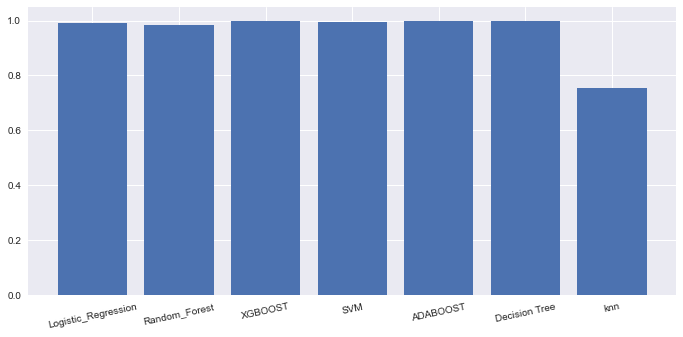

In [227]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
#models = ['Logistic_Regression', 'Random_Forest', 'XGBOOST', 'SVM', 'Naive_Bayes', 'ADABOOST', 'Decision Tree', 'knn']
#acc = [Logistic_Regression, Random_Forest , XGBOOST,  SVM , Naive_Bayes,ADABOOST ,Dt , knn]


models = ['Logistic_Regression', 'Random_Forest', 'XGBOOST', 'SVM',  'ADABOOST', 'Decision Tree', 'knn']
acc = [Logistic_Regression, Random_Forest , XGBOOST,  SVM , ADABOOST ,Dt , knn]


plt.xticks(rotation=12)
ax.bar(models,acc)
plt.show()

In [228]:
# calculate ROC curves
lgr_fpr, lgr_tpr, _ = roc_curve(Y_test, X_test_prediction)
rdf_fpr, rdf_tpr, _ = roc_curve(Y_test, y_predection)
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test, tfidf_val_predict)
svm_fpr, svm_tpr, _ = roc_curve(Y_test, y_pred2)
#nb_fpr, nb_tpr, _ = roc_curve(Y_test, predictions)
ada_fpr, ada_tpr, _ = roc_curve(Y_test, y_pred4)
dt_fpr, dt_tpr, _ = roc_curve(Y_test, y_pred5)
knn_fpr, knn_tpr, _ = roc_curve(Y_test,y_pred6)

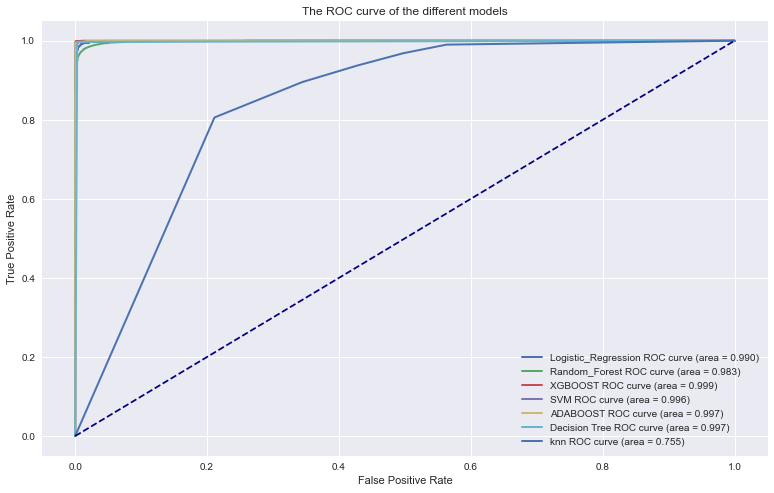

In [230]:
lw =2
plt.figure(figsize = (13,8))
plt.plot(fpr1, tpr1, lw = lw, label='Logistic_Regression ROC curve (area = %0.3f)' % Logistic_Regression)
plt.plot(fpr2, tpr2, lw = lw, label='Random_Forest ROC curve (area = %0.3f)' % Random_Forest)
plt.plot(fpr3, tpr3,  lw = lw, label='XGBOOST ROC curve (area = %0.3f)' % XGBOOST)
plt.plot(fpr4, tpr4, lw=lw,  label='SVM ROC curve (area = %0.3f)' % SVM)
#plt.plot(fpr5, tpr5,  lw = lw, label='Naive_Bayes ROC curve (area = %0.3f)' % Naive_Bayes)
plt.plot(fpr6, tpr6,  lw = lw, label='ADABOOST ROC curve (area = %0.3f)' % ADABOOST)
plt.plot(fpr7, tpr7, lw=lw,  label='Decision Tree ROC curve (area = %0.3f)' % Dt)
plt.plot(fpr9, tpr9,  lw = lw, label='knn ROC curve (area = %0.3f)' % knn)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('The ROC curve of the different models')
plt.legend()
plt.show()

### - Pipeline(CountVectorizer(), TfidfTransformer())

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(CountVectorizer(), TfidfTransformer())
pipe.fit(X)
x = pipe.transform(X)

In [24]:
x.shape

(44898, 89633)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, stratify=Y, random_state=2)

In [26]:
x.shape

(44898, 89633)

### LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, Y_train)

LogisticRegression()

In [29]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9910072943927836


In [31]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9847438752783965


In [33]:
print('Precision = ', precision_score(X_test_prediction, Y_test))
print('Recall = ', recall_score(X_test_prediction, Y_test))
print('f1_score = ', f1_score(X_test_prediction, Y_test))

Precision =  0.9825383304940375
Recall =  0.9882201756264725
f1_score =  0.985371062466631


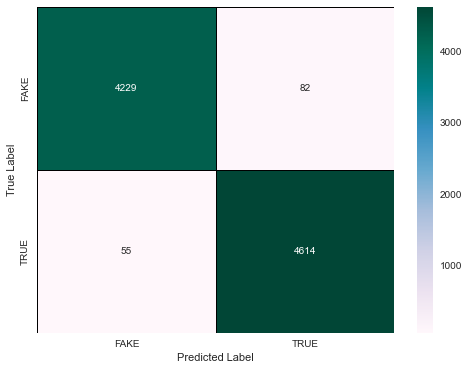

In [56]:
cm = confusion_matrix(X_test_prediction, Y_test)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuBuGn", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion matrix for logistic regression pipline ',dpi=300)

In [35]:
from sklearn.linear_model import LogisticRegression
# logistic regression
model1 = LogisticRegression()
# fit model
model1.fit(X_train, Y_train)
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)

In [36]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr1, p_tpr1, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [37]:
from sklearn.metrics import roc_auc_score
# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
print(auc_score1)

0.9981079065641021


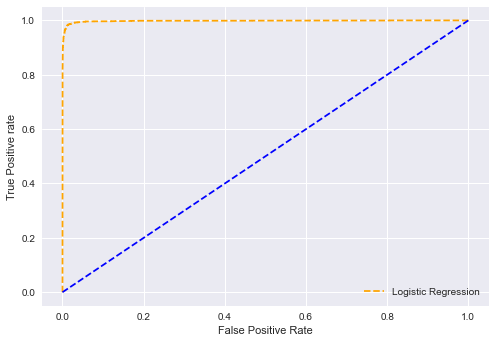

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr1, p_tpr1, linestyle='--', color='blue')
# title
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')


plt.savefig('ROC  of logistic regression  pipline',dpi=300)
plt.show();

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [41]:
clf=RandomForestClassifier(n_estimators=100)

In [42]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [43]:
y_predection=clf.predict(X_test)

In [44]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_predection))

Accuracy score of the test data :  0.9906458797327394


In [45]:
print('Precision = ', precision_score(y_predection, Y_test))
print('Recall = ', recall_score(y_predection, Y_test))
print('f1_score = ', f1_score(y_predection, Y_test))

Precision =  0.9887137989778535
Recall =  0.9933675652545999
f1_score =  0.991035218783351


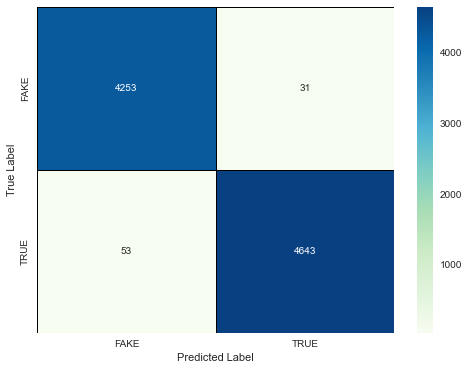

In [55]:
cm = confusion_matrix(Y_test,y_predection)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "GnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.savefig('confusion matrix for random forest pipline',dpi=300)

In [47]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr2, p_tpr2, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob2 = clf.predict_proba(X_test)

In [48]:
fpr2, tpr2, thresh1 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
from sklearn.metrics import roc_auc_score
# auc scores
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
print(auc_score2)

0.9992726044137131


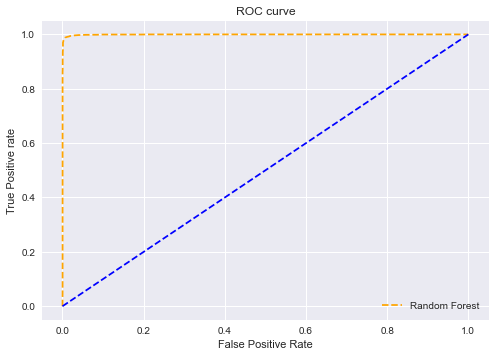

In [49]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('roc of random forest ',dpi=300)

plt.show();

### XGBoost

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb = XGBClassifier()
tfidf = xgb.fit(X_train,Y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
ypred = tfidf.predict( X_test)
print('Accuracy score of the test data : ',accuracy_score(Y_test, ypred))

Accuracy score of the test data :  0.9975501113585746


In [53]:
print('Precision = ', precision_score(ypred, Y_test))
print('Recall = ', recall_score(ypred, Y_test))
print('f1_score = ', f1_score(ypred, Y_test))

Precision =  0.9976575809199318
Recall =  0.9976575809199318
f1_score =  0.9976575809199318


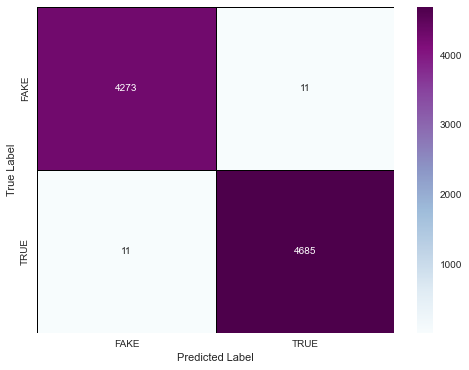

In [54]:
cm = confusion_matrix(Y_test, ypred)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "BuPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confision matrix for XGBoost pipline',dpi=300)

In [57]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr3, p_tpr3, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob3 = xgb.predict_proba(X_test)

In [58]:
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
from sklearn.metrics import roc_auc_score
# auc scores
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])
print(auc_score3)

0.9998159080497617


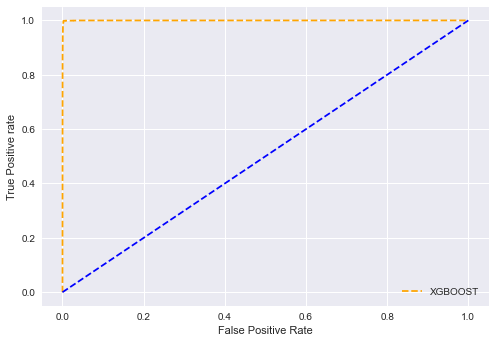

In [59]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='XGBOOST')

plt.plot(p_fpr3, p_tpr3, linestyle='--', color='blue')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc of XGBOOST pipline ',dpi=300)
plt.show();

### SVM

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [61]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [62]:
y_pred2 = clf.predict(X_test)
SVM=metrics.accuracy_score(Y_test, y_pred2)
print('Accuracy score of the test data : ',accuracy_score(Y_test,y_pred2))

Accuracy score of the test data :  0.9927616926503341


In [63]:
print('Precision = ', precision_score(y_pred2, Y_test))
print('Recall = ', recall_score(y_pred2, Y_test))
print('f1_score = ', f1_score(y_pred2, Y_test))

Precision =  0.991695059625213
Recall =  0.9944480034166133
f1_score =  0.9930696236272524


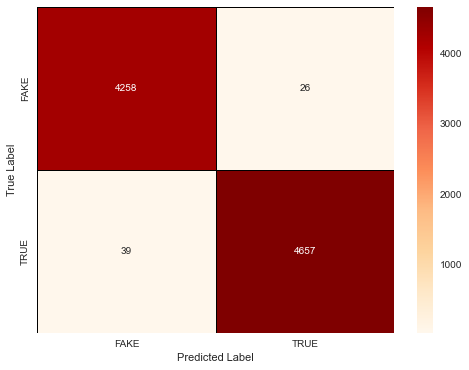

In [64]:
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test,y_pred2)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "OrRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.savefig('confusion matrix for svm pipline',dpi=300)

In [65]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr4, p_tpr4, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob4 = clf.predict_proba(X_test)

In [66]:
fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)
from sklearn.metrics import roc_auc_score
# auc scores
auc_score4 = roc_auc_score(Y_test, pred_prob4[:,1])
print(auc_score4)

0.9992476015107917


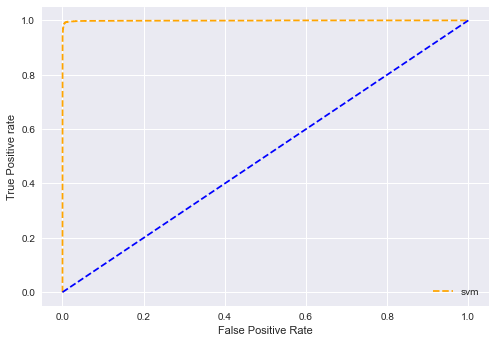

In [67]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='svm')
plt.plot(p_fpr4, p_tpr4, linestyle='--', color='blue')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc  of svm pipline ',dpi=300)
plt.show();

### Naive Bayes

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [70]:
predictions = nb.predict(X_test)

In [71]:
print('Accuracy score of the test data : ',accuracy_score(Y_test,predictions))

Accuracy score of the test data :  0.927728285077951


In [72]:
print('Precision = ', precision_score(predictions, Y_test))
print('Recall = ', recall_score(predictions, Y_test))
print('f1_score = ', f1_score(predictions, Y_test))

Precision =  0.9356899488926746
Recall =  0.9268086901497574
f1_score =  0.931228144537459


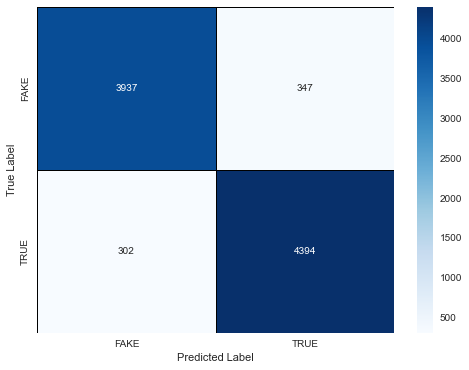

In [73]:
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, predictions)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion matrix for naive bayes pipline',dpi=300)

In [74]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr5, p_tpr5, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob5 = nb.predict_proba(X_test)

In [75]:
fpr5, tpr5, thresh5 = roc_curve(Y_test, pred_prob5[:,1], pos_label=1)
from sklearn.metrics import roc_auc_score
# auc scores
auc_score5 = roc_auc_score(Y_test, pred_prob5[:,1])
print(auc_score5)

0.9766324509644857


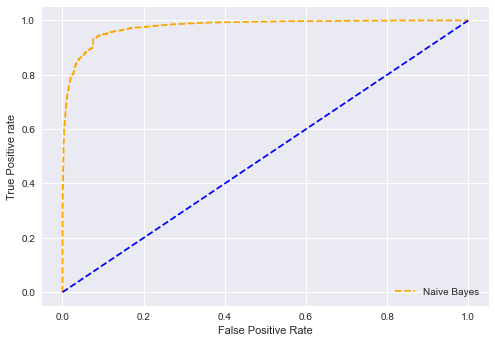

In [76]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr5, tpr5, linestyle='--',color='orange', label='Naive Bayes')

plt.plot(p_fpr5, p_tpr5, linestyle='--', color='blue')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc of naive bayes pipline ',dpi=300)
plt.show();

### ADABOOST

In [77]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [78]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model = abc.fit(X_train, Y_train)
y_pred4 = model.predict(X_test)

In [79]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred4))

Accuracy score of the test data :  0.9943207126948775


In [80]:
print('Precision = ', precision_score(y_pred4, Y_test))
print('Recall = ', recall_score(y_pred4, Y_test))
print('f1_score = ', f1_score(y_pred4, Y_test))

Precision =  0.9944633730834753
Recall =  0.9946751863684771
f1_score =  0.9945692684485146


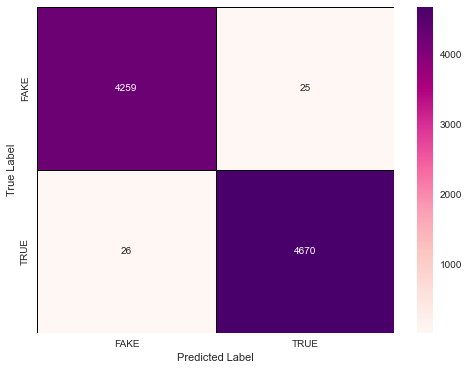

In [81]:
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test,y_pred4)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "RdPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion matrix for adaboost pipline',dpi=300)

In [82]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr6, p_tpr6, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob6 = abc.predict_proba(X_test)

In [83]:
fpr6, tpr6, thresh6 = roc_curve(Y_test, pred_prob6[:,1], pos_label=1)
from sklearn.metrics import roc_auc_score
# auc scores
auc_score6 = roc_auc_score(Y_test, pred_prob6[:,1])
print(auc_score6)

0.9993530063927899


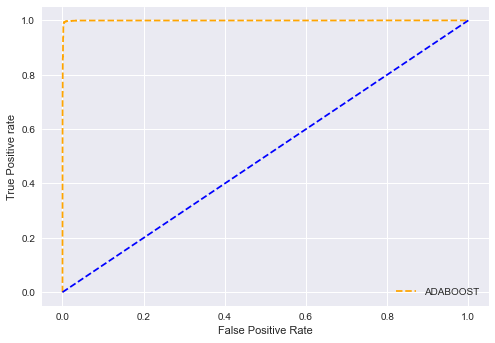

In [84]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='ADABOOST')
plt.plot(p_fpr6, p_tpr6, linestyle='--', color='blue')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc of adaboost pipline',dpi=300)
plt.show();

### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,Y_train)
y_pred5 = dt.predict(X_test)

In [87]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred5))

Accuracy score of the test data :  0.994988864142539


In [88]:
print('Precision = ', precision_score(y_pred5, Y_test))
print('Recall = ', recall_score(y_pred5, Y_test))
print('f1_score = ', f1_score(y_pred5, Y_test))

Precision =  0.9974446337308348
Recall =  0.9930040279838881
f1_score =  0.9952193774567089


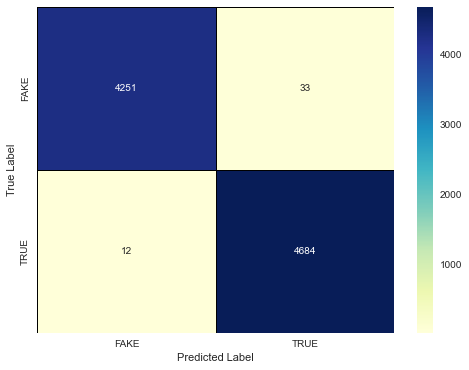

In [89]:
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test,y_pred5)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "YlGnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion matrix for decision tree pipline',dpi=300)

In [90]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr7, p_tpr7, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob7 = dt.predict_proba(X_test)

In [91]:
fpr7, tpr7, thresh7 = roc_curve(Y_test, pred_prob7[:,1], pos_label=1)
from sklearn.metrics import roc_auc_score
# auc scores
auc_score7 = roc_auc_score(Y_test, pred_prob7[:,1])
print(auc_score7)

0.9948707762491709


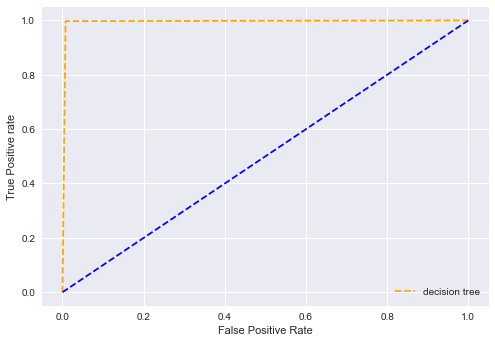

In [92]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr7, tpr7, linestyle='--',color='orange', label='decision tree')

plt.plot(p_fpr7, p_tpr7, linestyle='--', color='blue')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc  of decision tree pipline ',dpi=300)
plt.show();

### k-Nearest Neighbor

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)
y_pred6 = classifier.predict(X_test)

In [95]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred6))

Accuracy score of the test data :  0.692761692650334


In [96]:
print('Precision = ', precision_score(y_pred6, Y_test))
print('Recall = ', recall_score(y_pred6, Y_test))
print('f1_score = ', f1_score(y_pred6, Y_test))

Precision =  0.9735945485519591
Recall =  0.6343832385181074
f1_score =  0.7682096950348652


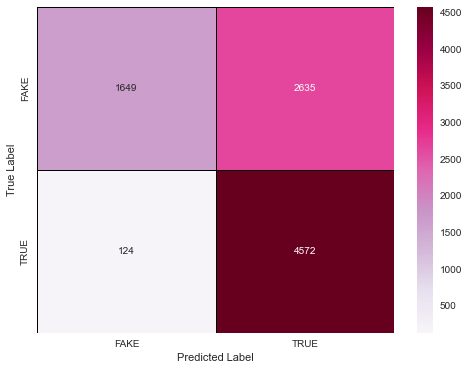

In [97]:
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test,y_pred6)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion matrix for knn pipline',dpi=300)

In [98]:
from sklearn.metrics import roc_curve
pred_prob9 = classifier.predict_proba(X_test)
fpr9, tpr9, thresh9 = roc_curve(Y_test, pred_prob9[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr9, p_tpr9, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [99]:
from sklearn.metrics import roc_auc_score
# auc scores
auc_score9 = roc_auc_score(Y_test, pred_prob9[:,1])
print(auc_score9)

0.7846757456531732


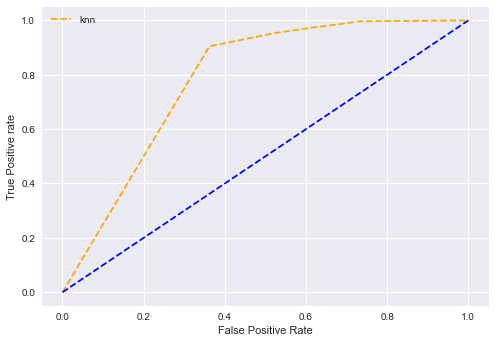

In [100]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr9, tpr9, linestyle='--',color='orange', label='knn')

plt.plot(p_fpr9, p_tpr9, linestyle='--', color='blue')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc of knn pipline ',dpi=300)
plt.show();

In [101]:
pip install PrettyTable

Note: you may need to restart the kernel to use updated packages.


In [102]:
from sklearn.metrics import  roc_auc_score

In [104]:
Logistic_Regression =roc_auc_score(Y_test, X_test_prediction)
Random_Forest =roc_auc_score(Y_test, y_predection)
XGBOOST =roc_auc_score(Y_test, ypred)
SVM =roc_auc_score(Y_test, y_pred2)
Naive_Bayes =roc_auc_score(Y_test, predictions)
ADABOOST =roc_auc_score(Y_test, y_pred4)
Dt =roc_auc_score(Y_test, y_pred5)
knn= roc_auc_score(Y_test,y_pred6)

In [105]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Logistic_Regression Algorithm", round(Logistic_Regression,4)])
x.add_row(["Random_Forest Algorithm", round(Random_Forest,4)])
x.add_row(["XGBOOST Algorithm", round(XGBOOST,4)])
x.add_row(["SVM Algorithm", round(SVM,4)])
x.add_row(["Naive_Bayes Algorithm ", round(Naive_Bayes,4)])
x.add_row(["ADABOOST Algorithm", round(ADABOOST,4)])
x.add_row(["Dt Algorithm", round(Dt,4)])
x.add_row(["knn Algorithm", round(knn,4)])

print(x)
print('\n')



Comparison of all algorithm results
+-------------------------------+----------+
|             Model             | Accuracy |
+-------------------------------+----------+
| Logistic_Regression Algorithm |  0.9848  |
|    Random_Forest Algorithm    |  0.9907  |
|       XGBOOST Algorithm       |  0.9975  |
|         SVM Algorithm         |  0.9928  |
|     Naive_Bayes Algorithm     |  0.9273  |
|       ADABOOST Algorithm      |  0.9943  |
|          Dt Algorithm         |  0.9949  |
|         knn Algorithm         |  0.6793  |
+-------------------------------+----------+




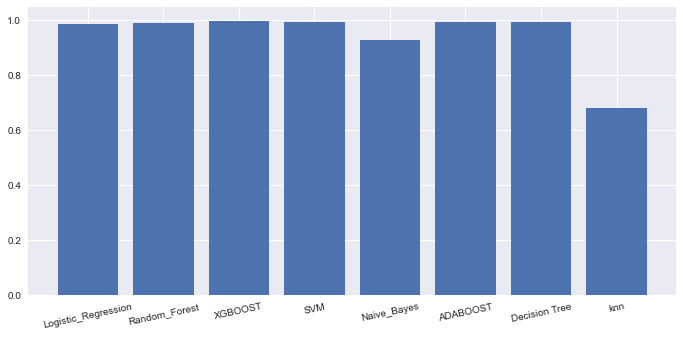

In [106]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
models = ['Logistic_Regression', 'Random_Forest', 'XGBOOST', 'SVM', 'Naive_Bayes', 'ADABOOST', 'Decision Tree', 'knn']
acc = [Logistic_Regression, Random_Forest , XGBOOST,  SVM , Naive_Bayes,ADABOOST ,Dt , knn]
plt.xticks(rotation=12)
plt.savefig('pipline',dpi=300)

ax.bar(models,acc)
plt.show()

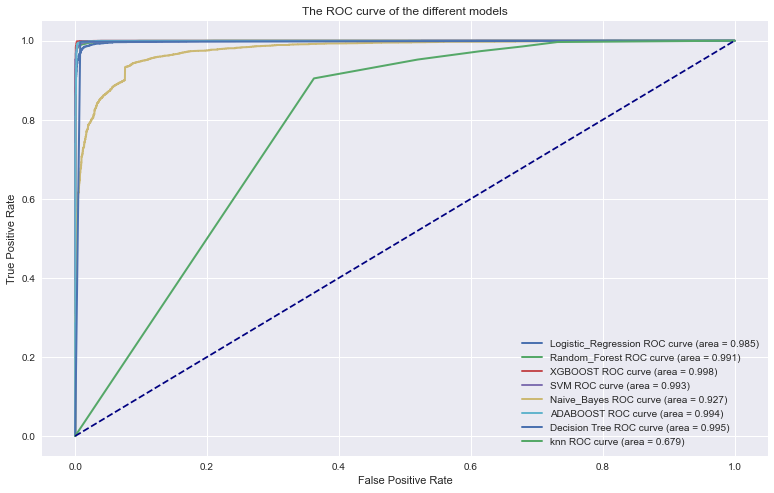

In [107]:
lw =2
plt.figure(figsize = (13,8))
plt.plot(fpr1, tpr1, lw = lw, label='Logistic_Regression ROC curve (area = %0.3f)' % Logistic_Regression)
plt.plot(fpr2, tpr2, lw = lw, label='Random_Forest ROC curve (area = %0.3f)' % Random_Forest)
plt.plot(fpr3, tpr3,  lw = lw, label='XGBOOST ROC curve (area = %0.3f)' % XGBOOST)
plt.plot(fpr4, tpr4, lw=lw,  label='SVM ROC curve (area = %0.3f)' % SVM)
plt.plot(fpr5, tpr5,  lw = lw, label='Naive_Bayes ROC curve (area = %0.3f)' % Naive_Bayes)
plt.plot(fpr6, tpr6,  lw = lw, label='ADABOOST ROC curve (area = %0.3f)' % ADABOOST)
plt.plot(fpr7, tpr7, lw=lw,  label='Decision Tree ROC curve (area = %0.3f)' % Dt)
plt.plot(fpr9, tpr9,  lw = lw, label='knn ROC curve (area = %0.3f)' % knn)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('The ROC curve of the different models')
plt.savefig('roc curve comapaison pipline',dpi=300)
plt.legend()
plt.show()